# LeNet Architecture

In [1]:
# Importing the necessary libraries

import glob
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPool2D, Flatten, Conv2D,  BatchNormalization, MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Ignoring the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
### Data Augmentation

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,rotation_range=45 )
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
# having train and test images

training_set=train_datagen.flow_from_directory('dataset/train', batch_size=16, class_mode='categorical', target_size=(225,225))
testing_set=test_datagen.flow_from_directory('dataset/test', batch_size=16, class_mode='categorical', target_size=(225,225))

Found 4420 images belonging to 15 classes.
Found 825 images belonging to 15 classes.


In [5]:
Classifier=Sequential()
Classifier.add(Convolution2D(filters=6, kernel_size=(5,5), strides=(1,1), input_shape=(225,225,3), padding=('valid'), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
Classifier.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(15, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 221, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 128)       7040      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [6]:
epochs = 200
batch_size = 16

In [7]:
mc = ModelCheckpoint('LENET.h5', monitor ='loss', save_best_only = True)

In [8]:
history=Classifier.fit( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs,
           validation_data=testing_set,validation_steps=testing_set.samples // batch_size,callbacks= [mc])

Epoch 1/200
276/276 [==============================] - 102s 368ms/step - loss: 2.7630 - accuracy: 0.1238 - val_loss: 2.5149 - val_accuracy: 0.1605
Epoch 2/200
276/276 [==============================] - 91s 330ms/step - loss: 2.4388 - accuracy: 0.2121 - val_loss: 2.3892 - val_accuracy: 0.2488
Epoch 3/200
276/276 [==============================] - 93s 337ms/step - loss: 2.3420 - accuracy: 0.2393 - val_loss: 2.2939 - val_accuracy: 0.2475
Epoch 4/200
276/276 [==============================] - 87s 316ms/step - loss: 2.2491 - accuracy: 0.2768 - val_loss: 2.3208 - val_accuracy: 0.2414
Epoch 5/200
276/276 [==============================] - 89s 323ms/step - loss: 2.1789 - accuracy: 0.3034 - val_loss: 2.2651 - val_accuracy: 0.2684
Epoch 6/200
276/276 [==============================] - 89s 322ms/step - loss: 2.1220 - accuracy: 0.3138 - val_loss: 2.2484 - val_accuracy: 0.2843
Epoch 7/200
276/276 [==============================] - 92s 334ms/step - loss: 2.0428 - accuracy: 0.3463 - val_loss: 2.7875 

Epoch 57/200
276/276 [==============================] - 89s 322ms/step - loss: 0.6875 - accuracy: 0.7931 - val_loss: 4.0442 - val_accuracy: 0.2978
Epoch 58/200
276/276 [==============================] - 91s 330ms/step - loss: 0.6748 - accuracy: 0.7979 - val_loss: 4.1748 - val_accuracy: 0.3297
Epoch 59/200
276/276 [==============================] - 87s 316ms/step - loss: 0.6635 - accuracy: 0.8009 - val_loss: 3.9016 - val_accuracy: 0.3113
Epoch 60/200
276/276 [==============================] - 87s 314ms/step - loss: 0.6630 - accuracy: 0.7956 - val_loss: 3.7527 - val_accuracy: 0.3162
Epoch 61/200
276/276 [==============================] - 88s 318ms/step - loss: 0.6669 - accuracy: 0.8077 - val_loss: 4.1030 - val_accuracy: 0.3002
Epoch 62/200
276/276 [==============================] - 86s 310ms/step - loss: 0.6341 - accuracy: 0.8025 - val_loss: 3.9875 - val_accuracy: 0.3113
Epoch 63/200
276/276 [==============================] - 86s 313ms/step - loss: 0.6515 - accuracy: 0.8052 - val_loss: 3

276/276 [==============================] - 84s 305ms/step - loss: 0.3590 - accuracy: 0.9203 - val_loss: 8.0279 - val_accuracy: 0.2757
Epoch 168/200
276/276 [==============================] - 84s 305ms/step - loss: 0.3289 - accuracy: 0.9183 - val_loss: 8.7854 - val_accuracy: 0.3002
Epoch 169/200
276/276 [==============================] - 84s 306ms/step - loss: 0.3698 - accuracy: 0.9171 - val_loss: 9.3329 - val_accuracy: 0.2794
Epoch 170/200
276/276 [==============================] - 84s 305ms/step - loss: 0.3498 - accuracy: 0.9173 - val_loss: 8.5342 - val_accuracy: 0.2880
Epoch 171/200
276/276 [==============================] - 84s 305ms/step - loss: 0.3650 - accuracy: 0.9155 - val_loss: 9.1142 - val_accuracy: 0.2868
Epoch 172/200
276/276 [==============================] - 84s 305ms/step - loss: 0.3152 - accuracy: 0.9214 - val_loss: 8.6688 - val_accuracy: 0.2855
Epoch 173/200
276/276 [==============================] - 84s 304ms/step - loss: 0.3207 - accuracy: 0.9221 - val_loss: 9.2787 -

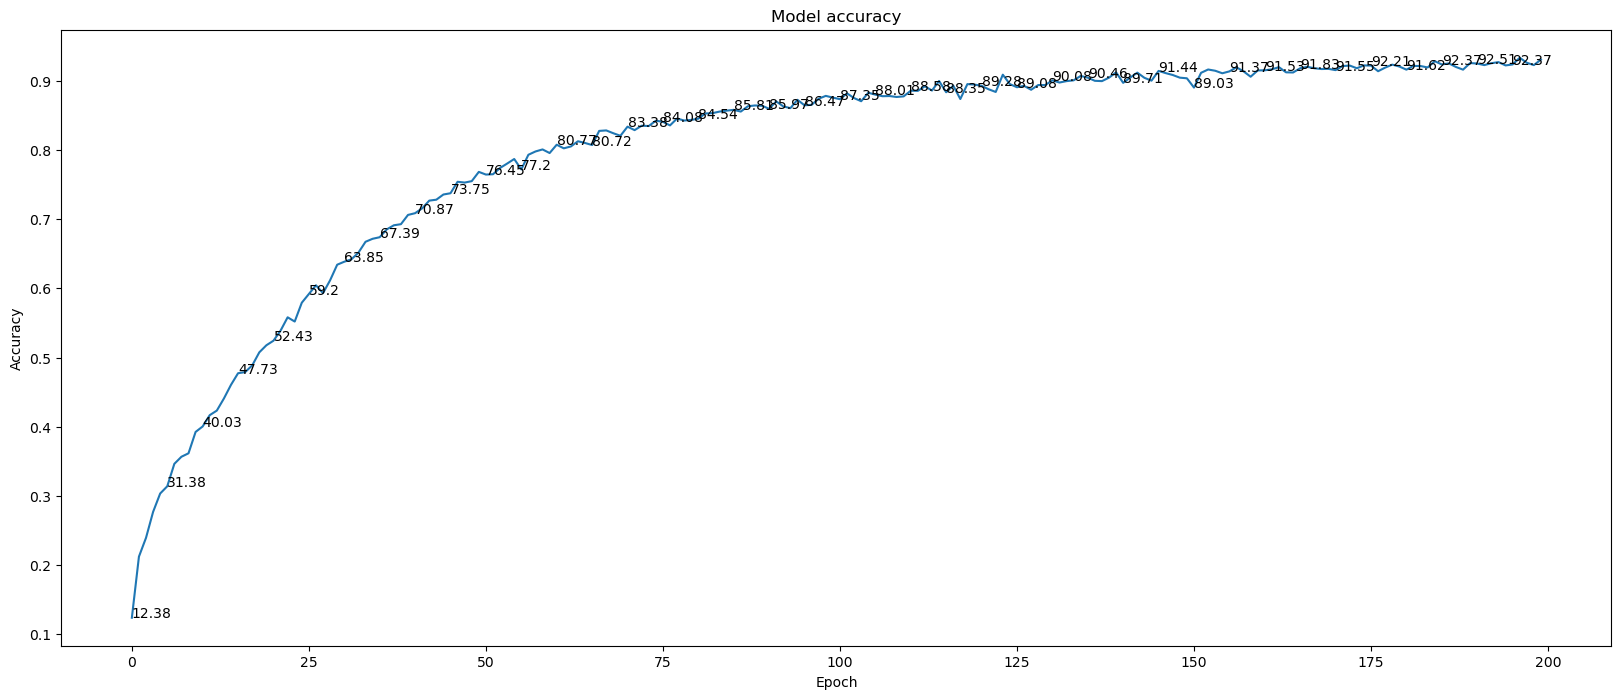

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

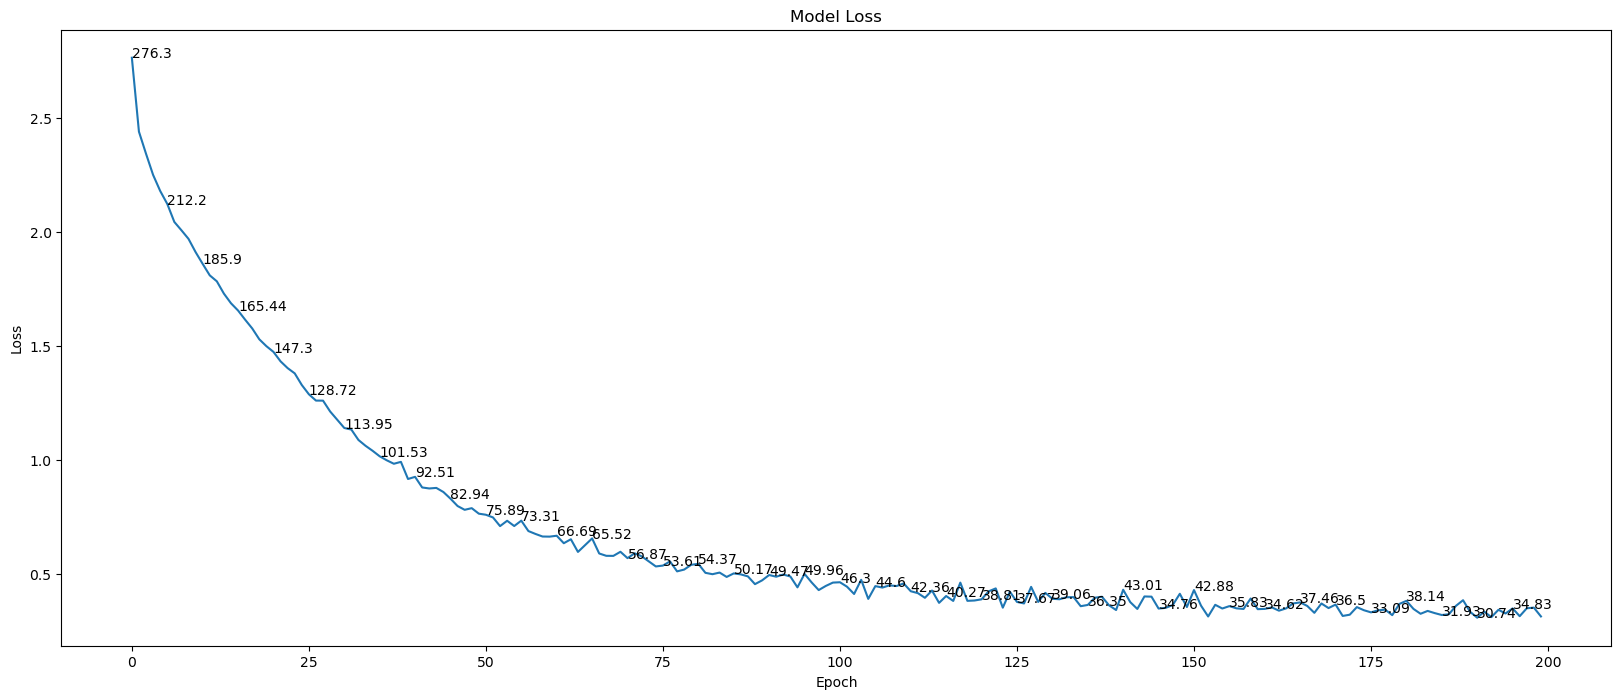

In [10]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()